In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [54]:
data = pd.read_excel("TextLabelDataframe.xlsx")

In [55]:
data.head()

,Text,FaxType
0,01 11 2019 4 39 12 pm 0600 cvs caremark page 1...,Fly
1,ne ity rar ri anna cn nna afl nn yn 4 fy janua...,Fly
2,| ® | ann hn ba | | vagus aar january 11 2019 ...,Fly
3,prime rf 10 6 1 11 2019 3 57 12 pm page 1 001 ...,Fly
4,5125333179 11 26 21 01 11 2019 1 1 tas png jan...,Thmp


In [56]:
data = data.dropna()
data = data.reset_index(drop= True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 2 columns):
Text       443 non-null object
FaxType    443 non-null object
dtypes: object(2)
memory usage: 7.0+ KB
None


In [57]:
import re

In [140]:
Text = []
for i in range(data.shape[0]):
    text = data['Text'][i]
#     print(text)
#     print(type(text))
#     print(i)
    text = re.sub('[\d]+ ', '', text)
    text = re.sub('[$]+', '', text)
    text = re.sub('[|]+', '', text)
    text = re.sub('[=]+', '', text)
    text = re.sub('[-]+', '', text)
    text = re.sub('[~]+', '', text)
    text = re.sub('[>]+', '', text)
    text = re.sub('[\\\]+', '', text)
    text = re.sub('[%]+ ', '', text)
    text = re.sub('[%]+', '', text)
    Text.append(text)

In [59]:
# from nltk.stem import PorterStemmer
# from nltk.stem import LancasterStemmer

In [60]:
# porter = PorterStemmer()
# lancaster=LancasterStemmer()

In [74]:
# nltk.download("wordwords = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /home/aman/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [83]:
a = []
for i in range(len(Text)):
    s = " ".join(w for w in nltk.wordpunct_tokenize(Text[i]) if w.lower() in words or not w.isalpha())
    a.append(s)

In [142]:
!pip install pyenchant

    100% |████████████████████████████████| 71kB 125kB/s ta 0:00:01
  Running setup.py bdist_wheel for pyenchant ... done
  Stored in directory: /home/aman/.cache/pip/wheels/ee/8e/01/f427e9c6c0ae5e22095f3d2aac8997abe7b317307a9de497f4
Successfully built pyenchant


In [143]:
import enchant

In [147]:
import enchant
eng = enchant.Dict("en_US")
a = []
for i in range(len(Text)):
    string =  Text[i]
    english_words = []
    for word in string.split():
        if eng.check(word):
            english_words.append(word)
    a.append(" ".join(english_words))

In [148]:
a

['pm page pharmacy update update applies c layout network pharmacies receive directly vs ea effective updating vendor segment payment sent per states national please direct questions com line business payer sheets additional claim processing information refer payer sheets com payer sheets recipient fax may make request opt receiving telemarketing fax transmissions numerous ways may opt recipient may call toll free number fax opt request time hours day days week recipient may also send opt request via email com opt request valid identifies number request relates person entity making request subsequent request provide express invitation send facsimile advertisements person entity particular number required law honor opt request within days receipt opt request opt purely informational non advertisements pharmacy communications new implementation notices changes point sale issues network enrollment forms amendments provider manual communication attachments may contain confidential informat

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(a)
title_features.get_shape()

(443, 7626)

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_essay_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_essay_features = tfidf_essay_vectorizer.fit_transform(a)
print('Shape of Sparse Matrix: ', tfidf_essay_features.shape)
print('Amount of Non-Zero occurences: ', tfidf_essay_features.nnz)

Shape of Sparse Matrix:  (443, 7626)
Amount of Non-Zero occurences:  78940


In [151]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(tfidf_essay_features, data['FaxType'])
predictions = mnb.predict(tfidf_essay_features)

In [152]:
from sklearn.metrics import accuracy_score
print(accuracy_score(data['FaxType'], predictions))

0.6343115124153499


In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test = train_test_split(tfidf_essay_features, data['FaxType'], test_size = 0.25, random_state= 0)

In [156]:
y_train.data

In [157]:
y_test.shape
# X_test.shape

(111,)

In [158]:
mnb = MultinomialNB().fit(X_train, y_train)
pred = mnb.predict(X_test)
print(accuracy_score(y_test, pred))


0.43243243243243246


In [160]:
from sklearn.naive_bayes import GaussianNB

In [163]:
model = GaussianNB().fit(X_train.toarray(), y_train)
pred = model.predict(X_test.toarray())
print(accuracy_score(y_test,pred))
print(model.)

0.5495495495495496


In [171]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(warm_start=True)
log.fit(X_train,y_train)
pred = log.predict(X_test)
pred_prob = log.predict_proba(X_test)
print(accuracy_score(y_test,pred))

0.5675675675675675


In [172]:
print(pred_prob)

[[0.01008117 0.01783835 0.03551006 ... 0.00993328 0.01150776 0.0138692 ]
 [0.01290233 0.0167932  0.03943295 ... 0.01478087 0.01461444 0.01613247]
 [0.01452393 0.0178431  0.05482176 ... 0.0141956  0.01534315 0.01795438]
 ...
 [0.01265314 0.01884083 0.0410458  ... 0.0124668  0.01376113 0.01779015]
 [0.01299298 0.01972666 0.03886216 ... 0.01198152 0.01445282 0.01917739]
 [0.01510512 0.02011221 0.04916763 ... 0.01501158 0.0179573  0.02012702]]


In [175]:
b = list(pred)
c = list(pred_prob)
df = pd.DataFrame({'Label': b, 'Probability': c})

In [176]:
df.head()

,Label,Probability
0,Fly,"[0.010081168840106545, 0.017838351830957406, 0..."
1,General,"[0.012902331833407594, 0.0167931957071345, 0.0..."
2,Order,"[0.014523931140504693, 0.017843102522508272, 0..."
3,Oral,"[0.01566386650366928, 0.02127125860476371, 0.0..."
4,Oral,"[0.01528403738408416, 0.021277407073411667, 0...."


In [178]:
maximum = []
for i in range(df.shape[0]):
    maximum.append(max(df['Probability'][i]))
df['Confidence Score'] = maximum

In [180]:
# sns.factorplot(x = df["Label"], y= df['Confidence Score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
Label               111 non-null object
Probability         111 non-null object
Confidence Score    111 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


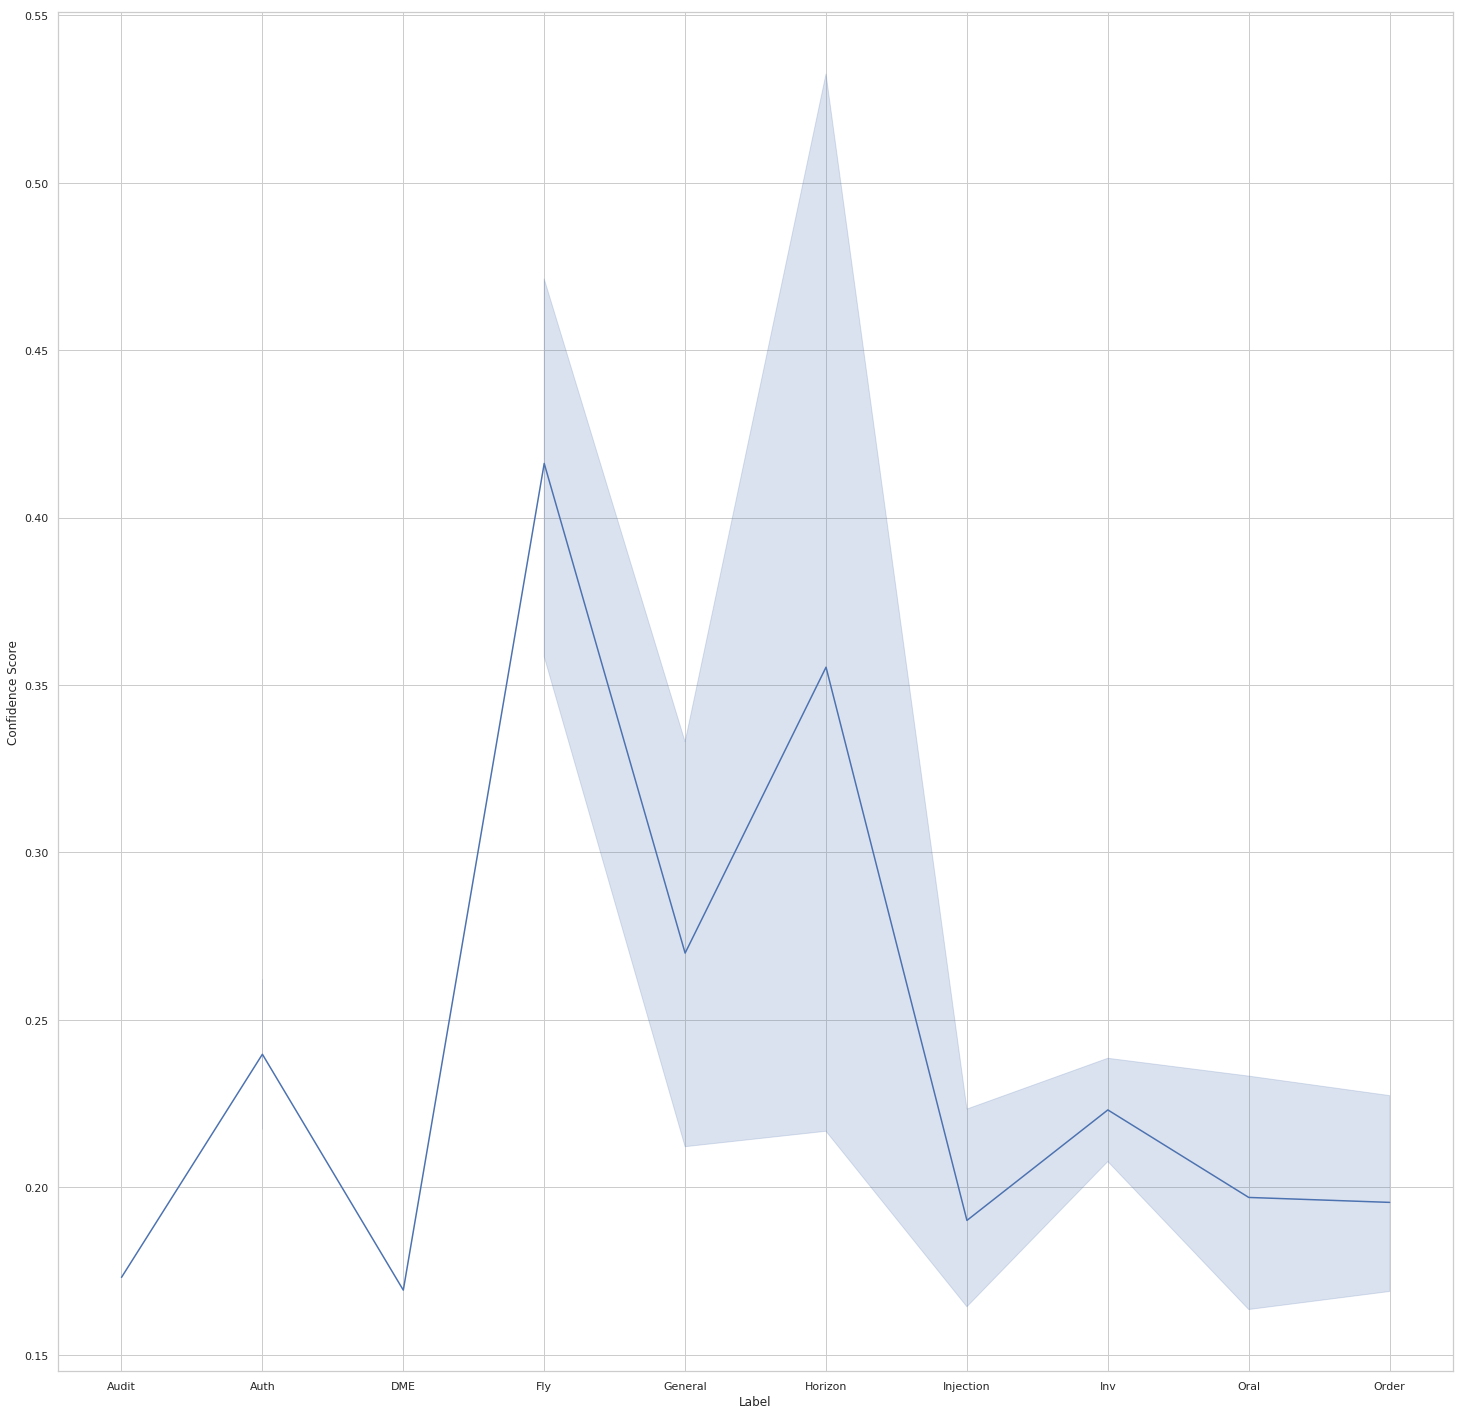

In [186]:
plt.figure(figsize=(25,25))
sns.lineplot(x = 'Label', y= 'Confidence Score', data= df)

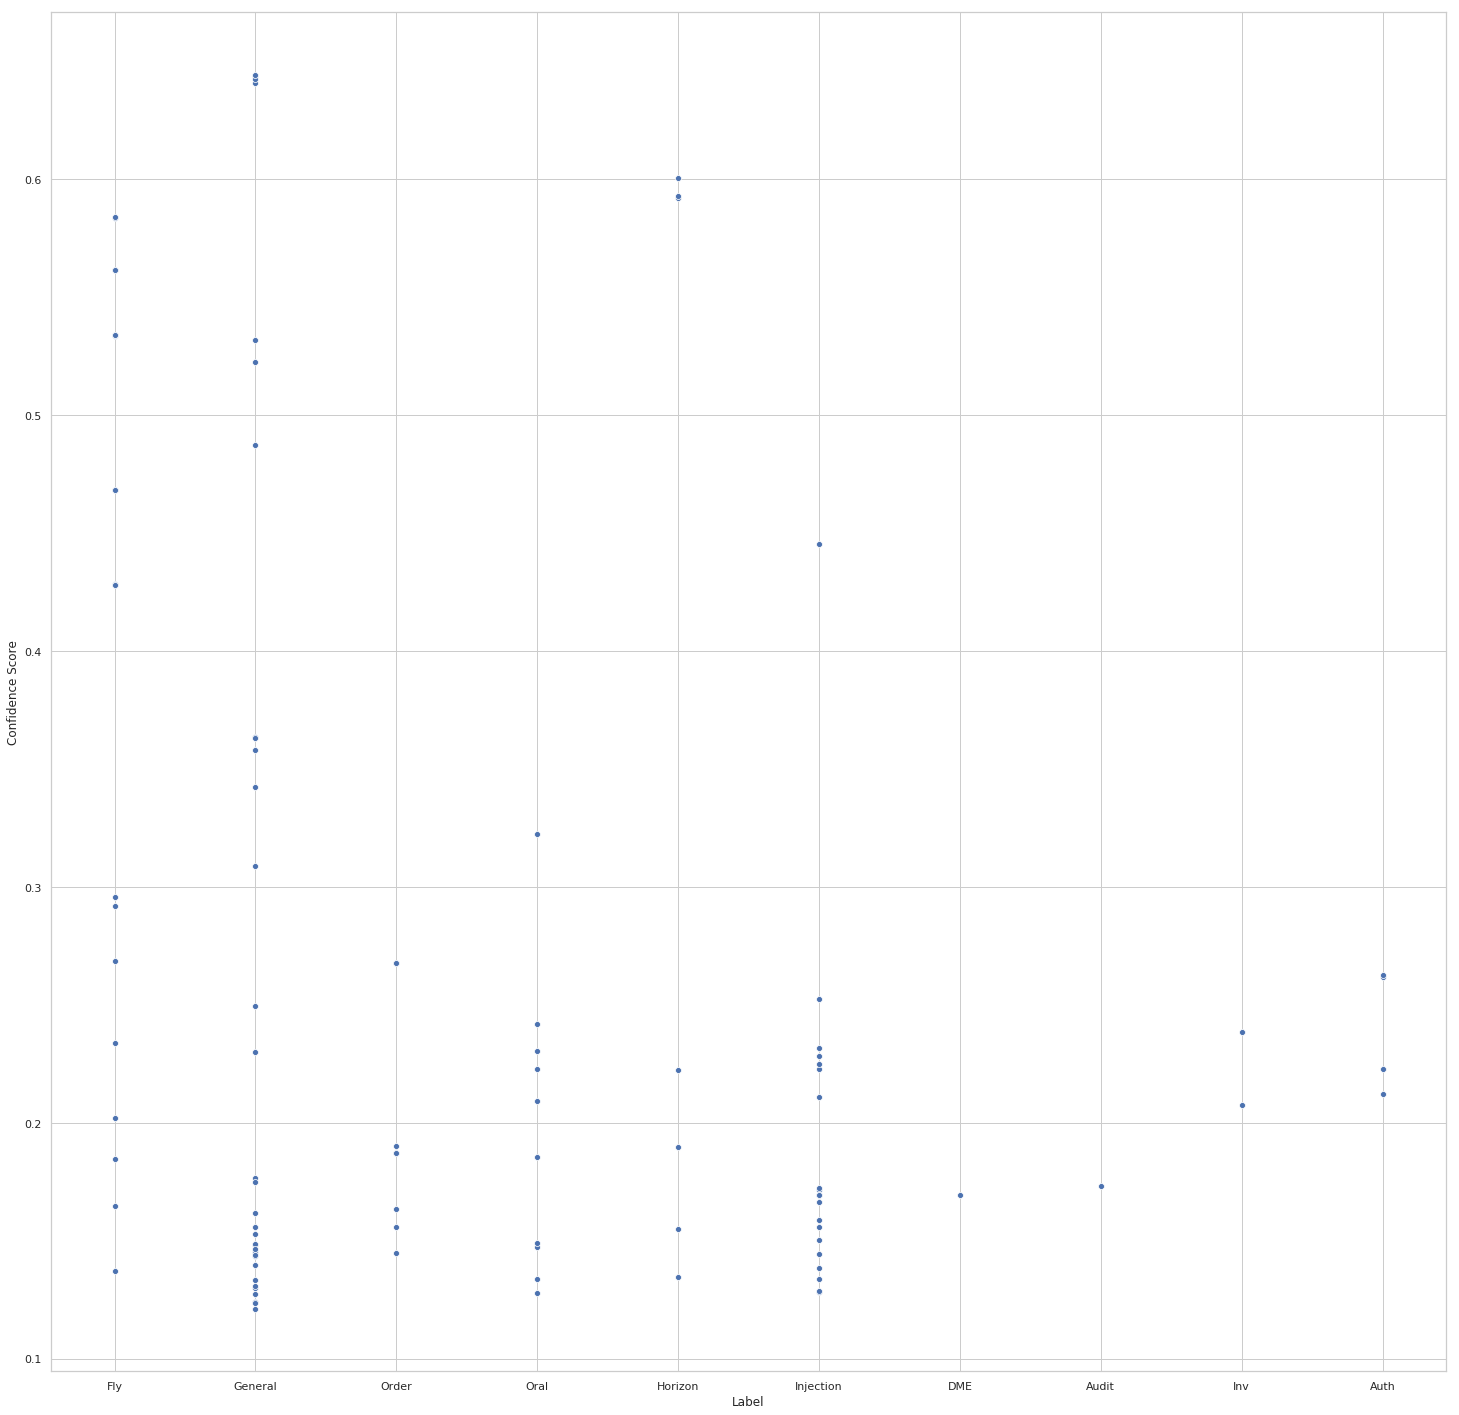

In [188]:
plt.figure(figsize=(25,25))
sns.scatterplot(x= 'Label', y= 'Confidence Score', data= df)

In [189]:
df.to_csv("xyz.csv")

In [190]:
dm = pd.read_csv('xyz.csv')

In [191]:
dm.head()

,Unnamed: 0,Label,Probability,Confidence Score
0,0,Fly,[0.01008117 0.01783835 0.03551006 0.01019611 0...,0.533954
1,1,General,[0.01290233 0.0167932 0.03943295 0.01351476 0...,0.155810
2,2,Order,[0.01452393 0.0178431 0.05482176 0.01350741 0...,0.190103
3,3,Oral,[0.01566387 0.02127126 0.05423043 0.01603635 0...,0.133907
4,4,Oral,[0.01528404 0.02127741 0.08928705 0.01488006 0...,0.127737


In [138]:
list(X_test.data)

[0.07465494074727945,
 0.07215910150514097,
 0.07465494074727945,
 0.05154863328567249,
 0.06999710721395033,
 0.07335897675229416,
 0.0283133139343955,
 0.035347496082736234,
 0.06999710721395033,
 0.067214695774119,
 0.06277131446851125,
 0.07335897675229416,
 0.07335897675229416,
 0.07215910150514097,
 0.07465494074727945,
 0.07465494074727945,
 0.07215910150514097,
 0.055571447919945775,
 0.13999421442790067,
 0.14671795350458833,
 0.036203063757260553,
 0.06277131446851125,
 0.11198402918256045,
 0.10579731423764052,
 0.04115643703572193,
 0.0870781053883183,
 0.15404576588267002,
 0.03834713784021564,
 0.10723674289965922,
 0.044348766737107005,
 0.053254515542211535,
 0.055992014591280226,
 0.04914557886186008,
 0.0936200938682666,
 0.04150093740428897,
 0.039847368299844796,
 0.055571447919945775,
 0.05289865711882026,
 0.04393884847555326,
 0.03099005904168011,
 0.044557684558181467,
 0.021044402903851116,
 0.04185292749496851,
 0.03595396797500569,
 0.0475517448482728,
 0.024

In [69]:
from nltk.tokenize import sent_tokenize, word_tokenize

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lancaster.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [76]:
stemmed = []
for i in range(len(Text)):
    x = stemSentence(Text[i])
    stemmed.append(x)

In [192]:
df['Label'].value_counts()

General      34
Fly          24
Injection    20
Oral         10
Order         8
Horizon       7
Auth          4
Inv           2
Audit         1
DME           1
Name: Label, dtype: int64

In [195]:
for i in range(df.shape[0]):
    if df['Label'][i] == 'Auth':
        print(df['Confidence Score'][i])

0.26175866740106724
0.22265058430165252
0.26254616248761015
0.2119233121052649


In [197]:
(0.26175866740106724+0.22265058430165252+0.26254616248761015+0.2119233121052649)/4

0.2397196815738987

In [199]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred, labels = ['General', 'Fly']))

[[17  0]
 [ 2 21]]
